<a href="https://colab.research.google.com/github/LazyRook01/BFS_GauravOjha_AppliedAI/blob/main/GBFS_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Greedy Best First Search Algorithm
***
**What is the Greedy-Best-First Search Algorithm?**

Greedy Best-First Search is an artificial intelligence search algorithm designed to discover a path from an initial point to a goal. It gives priority to paths that appear most promising based on a heuristic evaluation, even if they aren't necessarily the shortest routes. This algorithm operates by assessing the cost of each potential path and then expanding the one with the lowest cost. This process repeats until the goal is reached.

**How Greedy Best-First Search Works:**

Greedy Best-First Search determines the most promising path by evaluating costs and expanding the path with the lowest cost. It does so by employing a heuristic function that combines the current path cost with the estimated cost of the remaining paths. If the current path cost is lower than the estimated cost of the remaining paths, it selects that path. This iterative process continues until the algorithm reaches the goal.

**Advantages of Greedy Best-First Search:**

1. **Simplicity:** Greedy Best-First Search is a straightforward algorithm, making it easy to implement.
2. **Speed:** It is highly efficient, suitable for applications that require rapid processing.
3. **Low Memory Usage:** The algorithm demands minimal memory, making it suitable for memory-constrained applications.
4. **Versatility:** It can be adapted to various problem types and scaled to tackle more complex challenges.
5. **Efficiency:** When the heuristic function accurately estimates proximity to a solution, Greedy Best-First Search can efficiently find solutions, even in extensive search spaces.

**Disadvantages of Greedy Best-First Search:**

1. **Inaccuracy:** Greedy Best-First Search may not always locate the optimal solution as it prioritizes promising paths over necessarily shorter ones.
2. **Local Optima:** It can get stuck in local optima, leading to suboptimal path choices.
3. **Heuristic Dependency:** Greedy Best-First Search relies on a heuristic function, which adds complexity to its implementation.
4. **Lack of Completeness:** It is not a complete algorithm and may fail to find a solution in some cases, such as when encountering cycles or complex search spaces.

**Applications of Greedy Best-First Search:**

1. **Pathfinding:** Used for finding the shortest routes in applications like video games, robotics, and navigation systems.
2. **Machine Learning:** Employed in machine learning algorithms to discover promising paths within search spaces.
3. **Optimization:** Utilized to optimize system parameters for desired outcomes.
4. **Game AI:** Applied in game AI to evaluate and select optimal moves.
5. **Navigation:** Useful for mapping and navigating between locations efficiently.
6. **Natural Language Processing:** Applied to tasks like language translation and speech recognition to generate likely word sequences.
7. **Image Processing:** Utilized for image segmentation and region-of-interest detection in image processing.

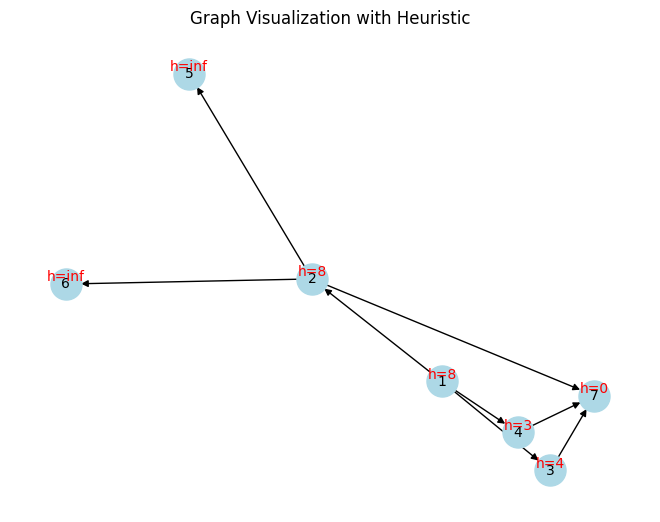

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
start_node = '1'
goal_node = '7'
graph_relation = {
    "1": ["2", "3", "4"],
    "2": ["5", "6", "7"],
    "3": ["7"],
    "4": ["7"],
    "5": [],
    "6": [],
    "7": [],
}

# Define the heuristic values
heuristic = {
    "1": 8,
    "2": 8,
    "3": 4,
    "4": 3,
    "5": float('inf'),
    "6": float('inf'),
    "7": 0,
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for node, neighbors in graph_relation.items():
    G.add_node(node, heuristic=heuristic[node])
    G.add_edges_from([(node, neighbor) for neighbor in neighbors])

# Define the positions for the nodes (you can customize this if needed)
pos = nx.spring_layout(G)

# Get the heuristic labels
heuristic_labels = {node: f'h={data["heuristic"]}' for node, data in G.nodes(data=True)}

# Draw the graph with heuristic labels
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
nx.draw_networkx_labels(G, pos, labels=heuristic_labels, font_size=10, font_color='red', verticalalignment="bottom")
plt.title('Graph Visualization with Heuristic')
plt.show()


In [ ]:
start_node='1'
goal_node='7'
graph_relation={
    "1":["2","3","4"],
    "2":["5","6","7"],
    "3":["7"],
    "4":["7"],
    "5":[],
    "6":[],
    "7":[],
}

Here's a detailed explanation of the code:

1. `start_node` and `goal_node`:
   - `start_node` is set to '1', indicating the node from which you want to start your exploration.
   - `goal_node` is set to '7', representing the node you want to reach or find a path to.

2. `graph_relation`:
   - This dictionary represents the graph structure. It's essentially an adjacency list, where each key is a node in the graph, and the corresponding value is a list of nodes that are directly connected to the key node.
   - Here's a breakdown of the relationships:

     - Node '1' is connected to nodes '2', '3', and '4'.
     - Node '2' is connected to nodes '5', '6', and '7'.
     - Node '3' is connected to node '7'.
     - Node '4' is connected to node '7'.
     - Nodes '5' and '6' have no outgoing connections.
     - Node '7' also has no outgoing connections, which makes it a potential goal node since it has no other paths to explore.

This code represents a simple graph structure and is often used in graph traversal algorithms like breadth-first search (BFS) or depth-first search (DFS) to find a path from the `start_node` to the `goal_node`.

In [ ]:
heuristic={
    "1":8,
    "2":8,
    "3":4,
    "4":3,
    "5":float('inf'),
    "6":float('inf'),
    "7":0,
}

Here we define a heuristic function for each node in the graph. A heuristic is an estimate of the cost or distance from a given node to the goal node in a search problem.

1. Node '1' has a heuristic value of 8.
2. Node '2' has a heuristic value of 8.
3. Node '3' has a heuristic value of 4.
4. Node '4' has a heuristic value of 3.
5. Nodes '5' and '6' have heuristic values set to positive infinity (`float('inf')`). This is typically used to indicate that these nodes are unreachable or have an unknown heuristic value, suggesting that they are not considered part of the solution path.
6. Node '7' has a heuristic value of 0. This means that node '7' is considered the goal node, and it has a heuristic value of 0 because, from itself to itself, the estimated cost is always 0.

In [ ]:
import heapq
def best_first_search(graph,start,goal,heuristic):
    que=[(heuristic[start],start)]
    visited={}
    visited[start]=None
    while que:
        node_value,peak_node=heapq.heappop(que)
        if peak_node==goal:
            break
        for neighbour in graph[peak_node]:
            if neighbour not in visited:
                print(que)
                heapq.heappush(que,(heuristic[neighbour],neighbour))
                visited[neighbour]=peak_node
    return visited

Here, we implement a best-first search algorithm using a priority queue (implemented as a heap) to explore a graph. This algorithm aims to find the path from a given `start` node to a `goal` node while considering a heuristic function (`heuristic`) to guide the search. Here's a detailed explanation of the code:

1. `import heapq`: This line imports the `heapq` module, which provides functions for working with heaps, including `heapq.heappop` and `heapq.heappush` used in the code.

2. `def best_first_search(graph, start, goal, heuristic)`: This defines a Python function called `best_first_search` that takes four parameters:
   - `graph`: The graph represented as an adjacency list.
   - `start`: The starting node for the search.
   - `goal`: The goal node that the search aims to reach.
   - `heuristic`: A dictionary containing heuristic values for each node in the graph.

3. `que`: This is a priority queue (implemented as a list of tuples) that stores nodes to be explored. Each tuple contains two values: the estimated cost to reach the node (`heuristic[start]` for the start node) and the node itself (`start` initially).

4. `visited`: This is a dictionary that keeps track of visited nodes. The keys are node identifiers, and the values are the parent nodes from which they were reached. Initially, the `start` node is marked as visited with a value of `None`.

5. The `while que:` loop is the main loop of the search algorithm. It continues as long as there are nodes in the priority queue to explore.

6. `node_value, peak_node = heapq.heappop(que)`: This line pops the node with the lowest estimated cost (`node_value`) from the priority queue. `peak_node` is the node being explored.

7. `if peak_node == goal:`: This condition checks if the current node (`peak_node`) is the goal node (`goal`). If it is, the search terminates because the goal has been reached.

8. The `for neighbour in graph[peak_node]:` loop iterates over the neighbors of the current node (`peak_node`) in the graph.

9. `if neighbour not in visited:`: This condition checks if the neighbor has not been visited previously. If it hasn't been visited, it is considered for exploration.

10. `heapq.heappush(que, (heuristic[neighbour], neighbour))`: This line adds the neighbor to the priority queue with its estimated cost as the priority (`heuristic[neighbour]`). This ensures that nodes with lower heuristic values are explored first.

11. `visited[neighbour] = peak_node`: The neighbor is marked as visited, and its parent node (the current node, `peak_node`) is recorded in the `visited` dictionary.

12. The loop continues until either the goal node is found or all reachable nodes have been explored.

13. Finally, the function returns the `visited` dictionary, which contains the path from the `start` node to the `goal` node.

In [ ]:
visited=best_first_search(graph_relation,start_node,goal_node,heuristic)
node=goal_node
path=[node]
while node!=start_node:
    node=visited[node]
    path.append(node)
path.reverse()
print("GBFS path from",start_node,"to",goal_node,":",path)

[]
[(8, '2')]
[(4, '3'), (8, '2')]
[(4, '3'), (8, '2')]
GBFS path from 1 to 7 : ['1', '4', '7']


Let's break down the code step by step:

1. `visited = best_first_search(graph_relation, start_node, goal_node, heuristic)`: This line invokes the `best_first_search` function with the provided graph, start node, goal node, and heuristic values. The function returns a `visited` dictionary that represents the path from the `start_node` to various nodes in the graph based on the GBFS algorithm.

2. `node = goal_node`: Initialize the `node` variable with the `goal_node`. This is the node from which we will start backtracking to find the path.

3. `path = [node]`: Create a list `path` to store the nodes in the path. Initially, it contains only the `goal_node`.

4. `while node != start_node:`: This loop iterates until the `node` becomes equal to the `start_node`, indicating that we have reached the starting point of the path.

5. `node = visited[node]`: Update the `node` variable by looking up its parent node in the `visited` dictionary. This effectively backtracks from the goal node to the start node.

6. `path.append(node)`: Add the updated `node` to the `path` list, building the path in reverse order (from goal to start).

7. `path.reverse()`: Reverse the `path` list to get the correct order of nodes from the `start_node` to the `goal_node`.

8. `print("GBFS path from", start_node, "to", goal_node, ":", path)`: Finally, print out the path from the `start_node` to the `goal_node` found by the GBFS algorithm.

# Visualization

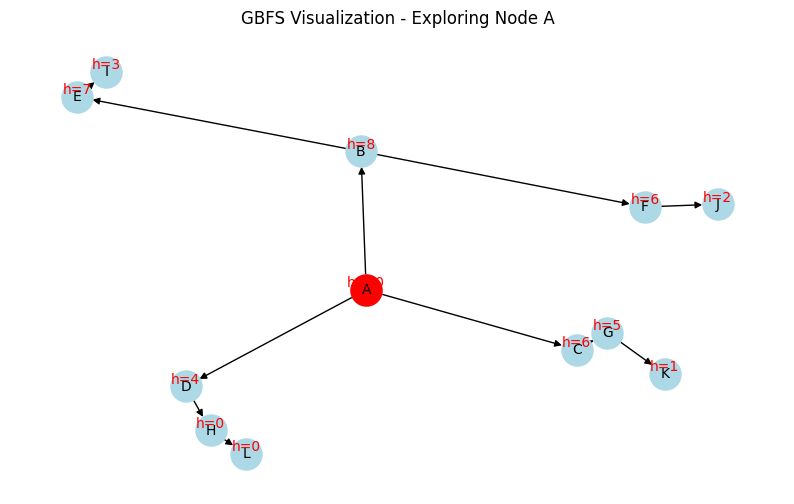

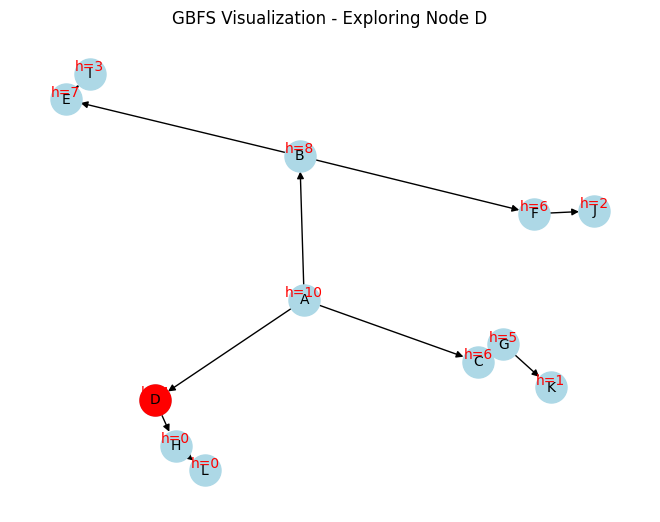

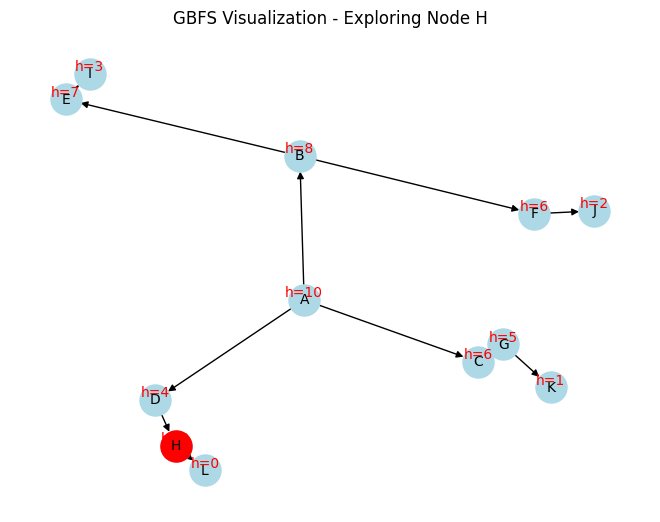

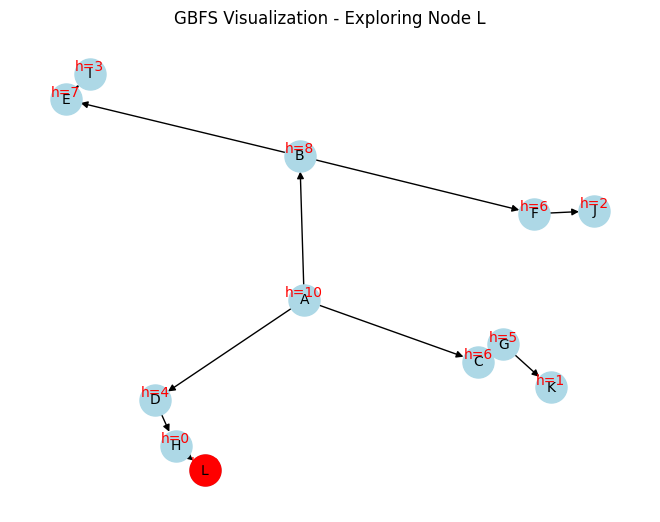

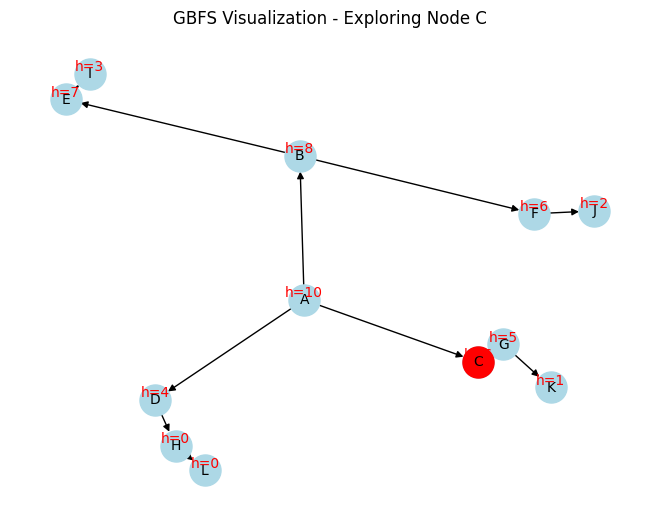

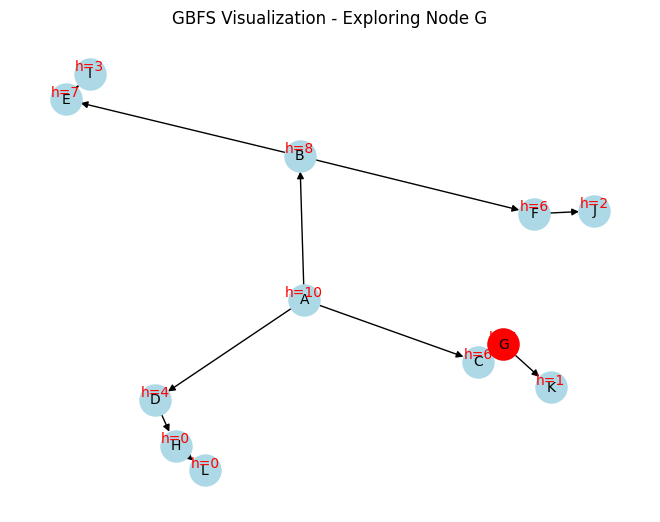

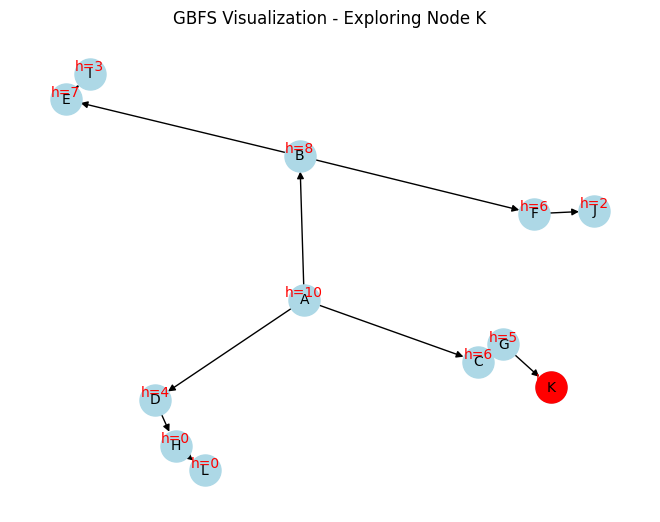

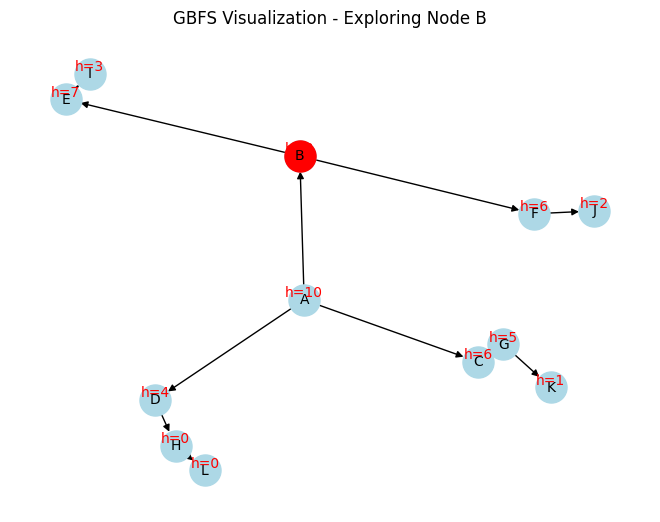

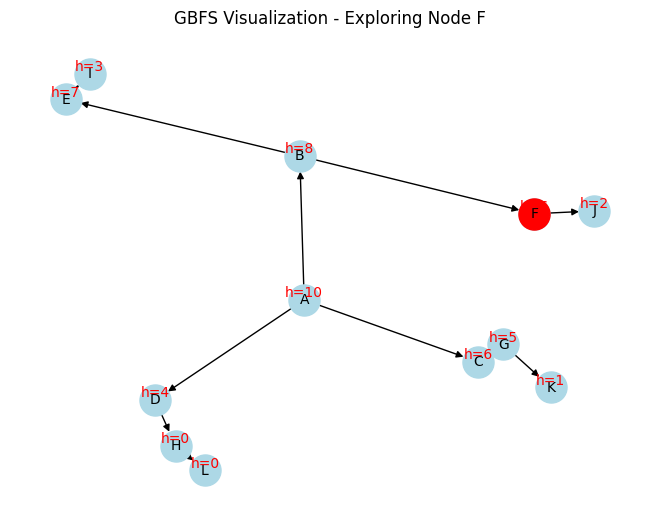

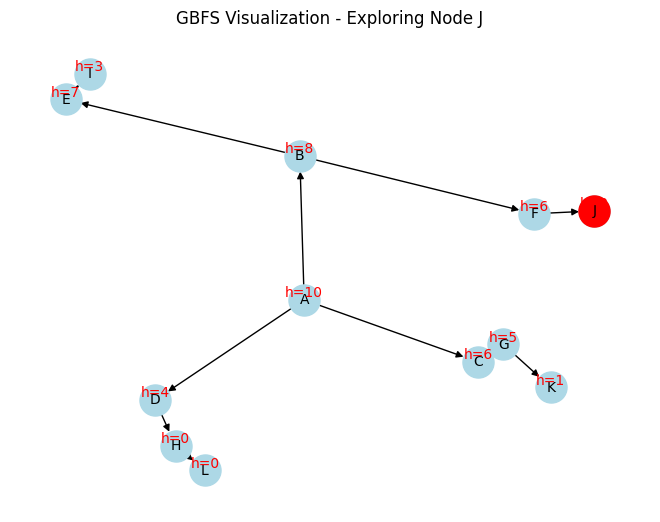

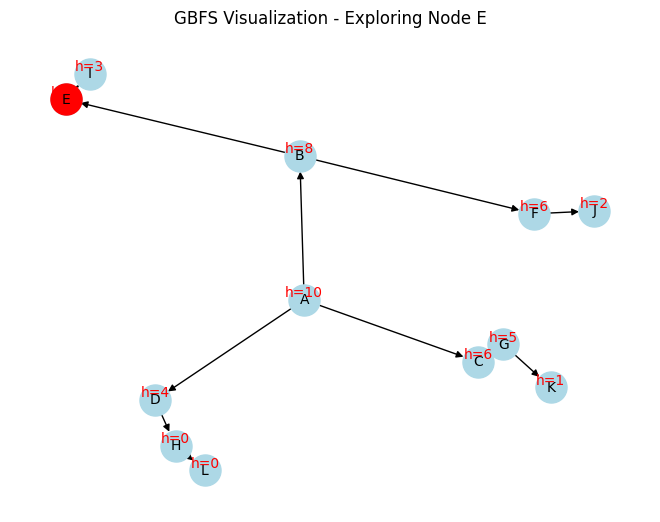

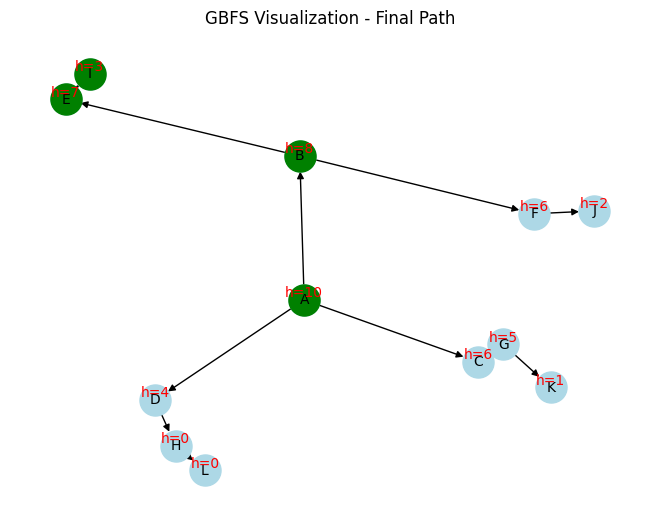

GBFS path from A to I : ['A', 'B', 'E', 'I']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

'''
# Define the graph
start_node = '2'
goal_node = '7'
graph_relation = {
    "1": ["2", "3", "4"],
    "2": ["5", "6", "7"],
    "3": ["7"],
    "4": ["7"],
    "5": [],
    "6": [],
    "7": [],
}

# Define the heuristic values
heuristic = {
    "1": 8,
    "2": 8,
    "3": 4,
    "4": 3,
    "5": float('inf'),
    "6": float('inf'),
    "7": 0,
}
'''
# Define the graph
start_node = 'A'
goal_node = 'I'
graph_relation = {
    "A": ["B", "C", "D"],
    "B": ["E", "F"],
    "C": ["G"],
    "D": ["H"],
    "E": ["I"],
    "F": ["J"],
    "G": ["K"],
    "H": ["L"],
    "I": [],
    "J": [],
    "K": [],
    "L": [],
}

# Define the heuristic values
heuristic = {
    "A": 10,
    "B": 8,
    "C": 6,
    "D": 4,
    "E": 7,
    "F": 6,
    "G": 5,
    "H": 0,
    "I": 3,
    "J": 2,
    "K": 1,
    "L": 0,
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for node, neighbors in graph_relation.items():
    G.add_node(node, heuristic=heuristic[node])
    G.add_edges_from([(node, neighbor) for neighbor in neighbors])

# Define the positions for the nodes (you can customize this if needed)
pos = nx.spring_layout(G)

# Get the heuristic labels
heuristic_labels = {node: f'h={data["heuristic"]}' for node, data in G.nodes(data=True)}

# Initialize visualization
plt.figure(figsize=(10, 6))
plt.title('GBFS Visualization')

visited = {}  # Store visited nodes and their predecessors

def best_first_search(graph, start, goal, heuristic, pos):
    que = [(heuristic[start], start)]
    visited[start] = None

    while que:
        node_value, peak_node = heapq.heappop(que)

        if peak_node == goal:
            break

        # Visualization: Highlight the current node in red
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
        nx.draw_networkx_labels(G, pos, labels=heuristic_labels, font_size=10, font_color='red', verticalalignment="bottom")
        nx.draw_networkx_nodes(G, pos, nodelist=[peak_node], node_color='red', node_size=500)
        plt.title('GBFS Visualization - Exploring Node ' + peak_node)
        plt.pause(1)

        for neighbour in graph[peak_node]:
            if neighbour not in visited:
                heapq.heappush(que, (heuristic[neighbour], neighbour))
                visited[neighbour] = peak_node

    return visited

visited = best_first_search(graph_relation, start_node, goal_node, heuristic, pos)

# Reconstruct the path
node = goal_node
path = [node]
while node != start_node:
    node = visited[node]
    path.append(node)
path.reverse()

# Visualization: Highlight the final path in green
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
nx.draw_networkx_labels(G, pos, labels=heuristic_labels, font_size=10, font_color='red', verticalalignment="bottom")
path_nodes = list(path)  # Use the reconstructed path for visualization
nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='green', node_size=500)
plt.title('GBFS Visualization - Final Path')
plt.show()

print("GBFS path from", start_node, "to", goal_node, ":", path)
